# 第二回:艺术画笔见乾坤
## 一、概述
### 1.matplotlib的三层api
matplotlib的原理或者说基础逻辑是，用Artist对象在画布(canvas)上绘制(Render)图形。
就和人作画的步骤类似：
1.准备一块画布或画纸
2.准备好颜料、画笔等制图工具
3.作画
所以matplotlib有三个层次的API:
matplotlib.backend_bases.FigureCanvas 代表了绘图区，所有的图像都是在绘图区完成的。
matplotlib.backend_bases.Renderer 代表了渲染器，可以近似理解为画笔，控制如何在 FigureCanvas 上画图。
matplotlib.artist.Artist 代表了具体的图表组件，即调用了Renderer的接口在Canvas上作图。
前两者处理程序和计算机的底层交互的事项，第三项Artist就是具体的调用接口来做出我们想要的图，比如图形、文本、线条的设定。所以通常来说，我们95%的时间，都是用来和matplotlib.artist.Artist类打交道的。

### 2.Artist的分类
Artist有两种类型:primitives和containers.
primitive是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如曲线Line2D，文字text，矩形Rectangle，图像image等。
container是容器，即用来装基本要素的地方，包括图形figure、坐标系Axes和坐标轴Axis。他们之间的关系如下图所示：
![avatar](https://img-blog.csdnimg.cn/20201122230916134.jpeg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl8zODYwNDk2MQ==,size_16,color_FFFFFF,t_70#pic_center)

### 3.matplotlib标准用法
matplotlib的标准使用流程为:
1.创建一个Figure实例
2.使用Figure实例创建一个或者多个Axes或Subplot实例
3.使用Axes实例辅助方法来创建primitive
值得一提的是，Axes是一种容器，它可能是matplotlib API中最重要的类，并且我们大多数时间都花在和它打交道上。更具体的信息会在第三节容器小节说明。

Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 1 ('{\\rtf1\\ansi\\ansicpg936\\cocoartf1671\\cocoasubrtf200')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 2 ('{\\fonttbl\\f0\\fnil\\fcharset0 Menlo-Regular;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 3 ('{\\colortbl;\\red255\\green255\\blue255;\\red0\\green0\\blue0;\\red255\\green255\\blue255;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 4 ('{\\*\\expandedcolortbl;;\\cssrgb\\c0\\c0\\c0;\\cssrgb\\c100000\\c100000\\c100000;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 5 ('\\paperw11900\\paperh16840\\margl1440\\margr1440\\vieww10800\\viewh8400\\viewkind0')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 6 ('\\deftab720')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 7 ('\\pard\\pardeftab720\\sl260\\partightenfactor0')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc'

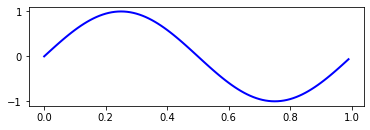

In [1]:
#一个流程示例及说明
import matplotlib.pyplot as plt
import numpy as np

#1.创建一个Figure实例
fig = plt.figure()

#2.然后用Figure实例创建了一个两行一列(即可以有两个subplot)的绘图区,并同时在第一个位置创建了一个subplot
ax = fig.add_subplot(2,1,1)  #two rows,one column,first plot

#3.然后用Axes实例的方法画一条曲线
t = np.arange(0.0,1.0,0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t,s,color='blue',lw=2)

# 二、基本元素-primitives
各容器中可能会包含多种基本要素-primitives, 所以先介绍下primitives，再介绍容器。
本章重点介绍下 primitives 的几种类型：曲线-Line2D，矩形-Rectangle，图像-image 

## 1.2DLines
在matplotlib中曲线的绘制，主要是通过类 matplotlib.lines.Line2D 来完成的。
它的基类: matplotlib.artist.Artist
matplotlib中线-line的含义：它表示的可以是连接所有顶点的实线样式，也可以是每个顶点的标记。此外，这条线也会受到绘画风格的影响，比如，我们可以创建虚线种类的线。
它的构造函数:
```
class matplotlib.lines.Line2D(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)
```
### 如何设置Line2D的属性
有三种方法可以用设置线的属性
1.直接在plot()函数中设置
2.通过获得线对象,对线对象进行设置
3.获得线属性，使用setp()函数设置


Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 1 ('{\\rtf1\\ansi\\ansicpg936\\cocoartf1671\\cocoasubrtf200')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 2 ('{\\fonttbl\\f0\\fnil\\fcharset0 Menlo-Regular;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 3 ('{\\colortbl;\\red255\\green255\\blue255;\\red0\\green0\\blue0;\\red255\\green255\\blue255;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 4 ('{\\*\\expandedcolortbl;;\\cssrgb\\c0\\c0\\c0;\\cssrgb\\c100000\\c100000\\c100000;}')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 5 ('\\paperw11900\\paperh16840\\margl1440\\margr1440\\vieww10800\\viewh8400\\viewkind0')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 6 ('\\deftab720')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc', line 7 ('\\pard\\pardeftab720\\sl260\\partightenfactor0')
Missing colon in file '/Users/ousei/.matplotlib/matplotlibrc'

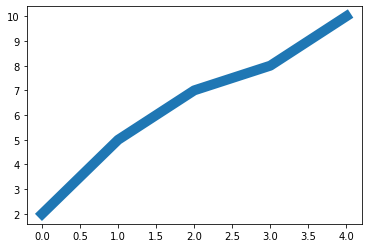

In [1]:
#1.直接在plot()函数中设置
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y,linewidth=10)  #设置线的粗细参数为10

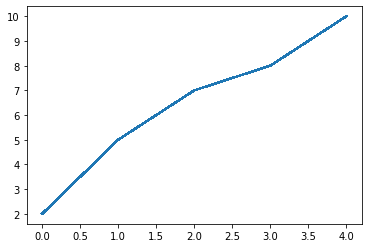

In [2]:
#2. 通过获得线对象,对线对象进行设置
x = range(0,5)
y = [2,5,7,8,10]
line = plt.plot(x,y,'-')
line[0].set_antialiased(False)  #关闭抗锯齿

[None, None]

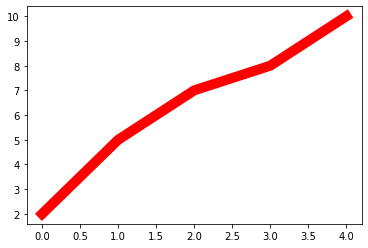

In [5]:
#获得线属性,使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x,y)
plt.setp(lines,color='r',linewidth=10)

### 如何绘制lines
1.绘制直线line

2.errorbar绘制误差折线图

绘制直线line常用的方法有两种:
- pyplot方法绘制
- Line2D对象绘制


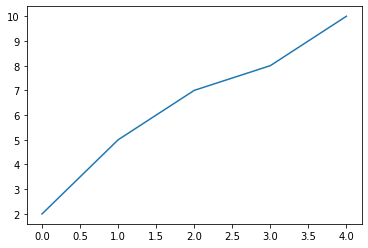

In [6]:
#1.pyplot方法绘制
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y)

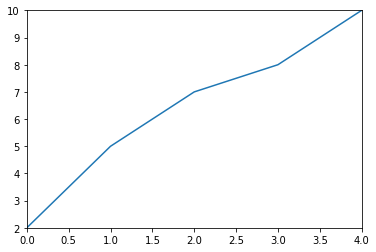

In [10]:
#2.Line2D对象绘制
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig = plt.figure()
ax = fig.add_subplot(111)
line = Line2D(x,y)
ax.add_line(line)
ax.set_xlim(min(x),max(x))
ax.set_ylim(min(y),max(y))

plt.show()


### errorbar绘制误差折线图
pyplot里有个专门绘制误差线的功能，通过errorbar类实现，它的构造函数：
```
matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, *, data=None, **kwargs)
```
其中最主要的参数是前几个:
- x:需要绘制的line中点的在x轴上的取值
- y:需要绘制的line中点的在y轴上的取值
- yerr:指定y轴水平的误差
- xerr:指定x轴水平的误差
- fmt:指定折线图中某个点的颜色,形状,线条风格,例如'co--'
- ecolor:指定error bar的颜色
- elinewidth: 指定error bar的线条宽度

<ErrorbarContainer object of 3 artists>

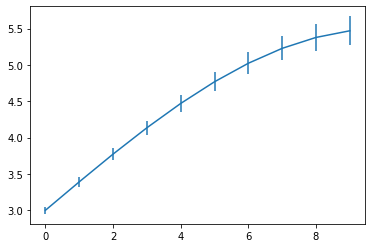

In [8]:
#绘制errorbar
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.arange(10)
y = 2.5*np.sin(x/20*np.pi)
yerr = np.linspace(0.05,0.2,10)
plt.errorbar(x,y+3,yerr=yerr,label="both limits(defalult)")

# 2.Patches
matplotlib.patches.Patch类是二维图形类。它的基类是matplotlib.artist.Artist，它的构造函数：
详细清单见 matplotlib.patches API
```
Patch(edgecolor=None, facecolor=None, color=None, linewidth=None, linestyle=None, antialiased=None, hatch=None, fill=True, capstyle=None, joinstyle=None, **kwargs)
```
## a.Rectangle-矩形
Rectangle矩形类在官网中的定义是： 通过锚点xy及其宽度和高度生成。 Rectangle本身的主要比较简单，即xy控制锚点，width和height分别控制宽和高。它的构造函数：
``` 
class matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)
```
在实际中最常见的矩形图是**hist直方图和bar条形图**。
### hist-直方图
```
matplotlib.pyplot.hist(x,bins=None,range=None, density=None, bottom=None, histtype='bar', align='mid', log=False, color=None, label=None, stacked=False, normed=None)
```
一些常用的参数:
- x: 数据集，最终的直方图将对数据集进行统计
- bins: 统计的区间分布
- range: tuple, 显示的区间，range在没有给出bins时生效
- density: bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果- 区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density
- histtype: 可选{'bar', 'barstacked', 'step', 'stepfilled'}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似
- align: 可选{'left', 'mid', 'right'}之一，默认为'mid'，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
- log: bool，默认False,即y坐标轴是否选择指数刻度
- stacked: bool，默认为False，是否为堆积状图

(0.0, 100.0)

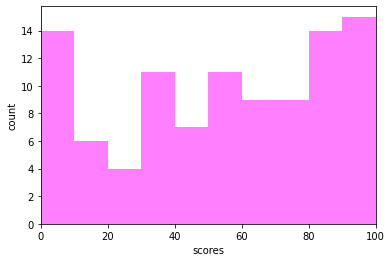

In [7]:
# hist绘制直方图
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randint(0,100,100) #生成[0-100]
bins = np.arange(0,101,10) # 设置连续的边界值，即直方图的分布区间[0,10),[10,20)...
plt.hist(x,bins,color='fuchsia',alpha=0.5)  #alpha设置透明度,0为完全透明
plt.xlabel("scores")
plt.ylabel("count")
plt.xlim(0,100) #设置x轴分布范围plt.show()


In [9]:
# Rectangle矩形类绘制直方图
import pandas as pd
import re

**2) bar-柱状图**   
  
>matplotlib.pyplot.bar(left, height, alpha=1, width=0.8, color=, edgecolor=, label=, lw=3)
  
下面是一些常用的参数：    
+ **left**：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串  
+ **height**：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；  
+ **alpha**：透明度，值越小越透明  
+ **width**：为柱形图的宽度，一般这是为0.8即可；  
+ **color或facecolor**：柱形图填充的颜色；  
+ **edgecolor**：图形边缘颜色   
+ **label**：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签      
  
   
有两种方式绘制柱状图
+ bar绘制柱状图  
+ `Rectangle`矩形类绘制柱状图

<BarContainer object of 16 artists>

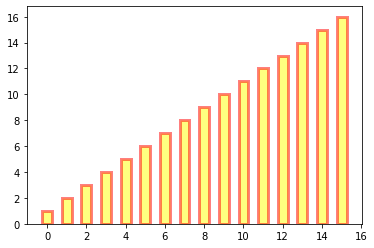

In [10]:
# bar绘制柱状图
import matplotlib.pyplot as plt
y = range(1,17)
plt.bar(np.arange(16),y,alpha=0.5,width=0.5,color="yellow",edgecolor="red",label="The First Bar",lw=3)

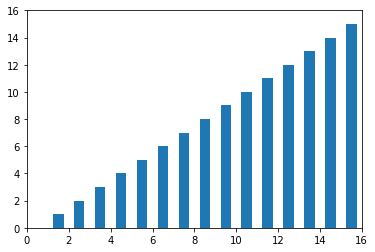

In [12]:
# Rectangle矩形类绘制柱状图
fig = plt.figure()
axl = fig.add_subplot(111)

for i in range(1,17):
    rect = plt.Rectangle((i+0.25,0),0.5,i)
    axl.add_patch(rect)
axl.set_xlim(0,16)
axl.set_ylim(0,16)
plt.show()  

## b.Polygon-多边形
matplotlib.patches.Polygon类是多边形类。其基类是matplotlib.patches.Patch，它的构造函数：
>class matplotlib.patches.Polygon(xy, closed=True, **kwargs)

xy是一个N*2的numpy array,为多边形的顶点

matplotlib.patches.Polygon类中常用的是fill类，它是基于xy绘制一个填充的多边形，它的定义：

>matplotlib.pyplot.fill(*args, data=None, **kwargs)

参数说明 : 关于x、y和color的序列，其中color是可选的参数，每个多边形都是由其节点的x和y位置列表定义的，后面可以选择一个颜色说明符。您可以通过提供多个x、y、[颜色]组来绘制多个多边形。

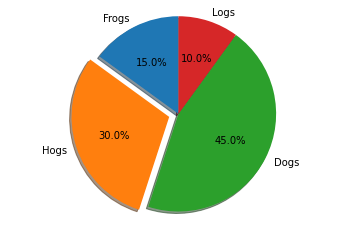

In [13]:
#pie绘制饼图
import matplotlib.pyplot as plt
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10] 
explode = (0, 0.1, 0, 0) 
fig1,ax1 = plt.subplots()
ax1.pie(sizes,explode = explode,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# 三、对象容器 - Object container
容器会包含一些`primitives`，并且容器还有它自身的属性。  
比如`Axes Artist`，它是一种容器，它包含了很多`primitives`，比如`Line2D`，`Text`；同时，它也有自身的属性，比如`xscal`，用来控制X轴是`linear`还是`log`的。 

## 1.Figure容器
`matplotlib.figure.Figure`是`Artist`最顶层的`container`-对象容器，它包含了图表中的所有元素。一张图表的背景就是在`Figure.patch`的一个矩形`Rectangle`。  
当我们向图表添加`Figure.add_subplot()`或者`Figure.add_axes()`元素时，这些都会被添加到`Figure.axes`列表中。

AxesSubplot(0.125,0.536818;0.775x0.343182)
[<AxesSubplot:>, <Axes:>]


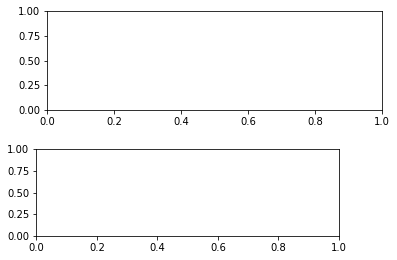

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(211)  #作一副2*1的图,选择第1个子图
ax2 = fig.add_axes([0.1,0.1,0.7,0.3])   #位置参数，四个数分别代表了(left,bottom,width,height)
print(ax1)
print(fig.axes)   #fig.axes 中包含了subplot和axes两个实例,刚刚添加的

由于`Figure`维持了`current axes`，因此你不应该手动的从`Figure.axes`列表中添加删除元素，而是要通过`Figure.add_subplot()`、`Figure.add_axes()`来添加元素，通过`Figure.delaxes()`来删除元素。但是你可以迭代或者访问`Figure.axes`中的`Axes`，然后修改这个`Axes`的属性。   
  
比如下面的遍历axes里的内容，并且添加网格线：

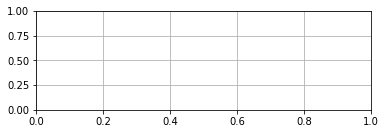

In [15]:
fig = plt.figure()
ax1 = fig.add_subplot(211)

for ax in fig.axes:
    ax.grid(True)

`Figure`也有它自己的`text、line、patch、image`。你可以直接通过`add primitive`语句直接添加。但是注意`Figure`默认的坐标系是以像素为单位，你可能需要转换成figure坐标系：(0,0)表示左下点，(1,1)表示右上点。

**Figure容器的常见属性：**  
`Figure.patch`属性：Figure的背景矩形  
`Figure.axes`属性：一个Axes实例的列表（包括Subplot)  
`Figure.images`属性：一个FigureImages patch列表  
`Figure.lines`属性：一个Line2D实例的列表（很少使用）  
`Figure.legends`属性：一个Figure Legend实例列表（不同于Axes.legends)  
`Figure.texts`属性：一个Figure Text实例列表  

`matplotlib.axes.Axes`是matplotlib的核心。大量的用于绘图的`Artist`存放在它内部，并且它有许多辅助方法来创建和添加`Artist`给它自己，而且它也有许多赋值方法来访问和修改这些`Artist`。  

和`Figure`容器类似，`Axes`包含了一个patch属性，对于笛卡尔坐标系而言，它是一个`Rectangle`；对于极坐标而言，它是一个`Circle`。这个patch属性决定了绘图区域的形状、背景和边框。

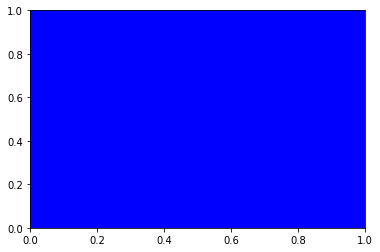

In [16]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch    #axes的patch是一个Rectangle实例
rect.set_facecolor('blue')